## Compare regres vs classfi -  Binary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.metrics import accuracy_score

import pickle
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')


# read pickle
with open('./X.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('./y.pickle', 'rb') as handle:
    y = pickle.load(handle)

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # fix error on MAC_OS when using light gbm, xgboost
from sklearn.metrics import mean_squared_error

import lightgbm
import xgboost
import matplotlib.pyplot as plt

num_trees = 100
max_depth_tree  = 5

m = lightgbm.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=1, max_depth=max_depth_tree,
       min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
       n_estimators=num_trees, n_jobs=-1, num_leaves=31, objective="binary",
       random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=2000, subsample_freq=0)
m.fit(X, y, verbose=1)

res_1 = np.round(m.predict(X),4)
res_1_rounded = list(map(lambda x: int(round(x, 0)), res_1))

# f = lightgbm.create_tree_digraph(m, tree_index=0, show_info=["split_gain",\
#                                                 "internal_value", "internal_count", "leaf_count"] )
# # f.view()

In [ ]:
m2 = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31, objective="binary",
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
m2.fit(X, y, verbose=1)

res_2 = m2.predict(X)
res_2_prob = np.round(m2.predict_proba(X),4)
# f2 = lightgbm.create_tree_digraph(m2, tree_index=0, show_info=["split_gain",
#                                                  "internal_value", "internal_count", "leaf_count"] )

# f2.view()

In [ ]:
res_1[:30]

In [ ]:
res_2_prob[:30,1]

In [ ]:
## check 
print(sum(np.abs(res_1_rounded - res_2)))
print(accuracy_score(res_1_rounded, y))
print(accuracy_score(res_2, y))

## Compare regres vs classfi - Mul Class

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.metrics import accuracy_score

import pickle
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')


# read pickle
with open('./X.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('./y.pickle', 'rb') as handle:
    y = pickle.load(handle)

random_index = list(y.sample(250).index)

y_df = pd.DataFrame({'value':y, 'id': list(range(len(y)))})
y_df.value = y_df.apply(lambda x: 2 if x.id in random_index else x.value, 1)
print(Counter(y_df.value))

y = y_df.value

Counter({0: 383, 2: 250, 1: 248})


In [69]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # fix error on MAC_OS when using light gbm, xgboost
from sklearn.metrics import mean_squared_error

import lightgbm
import xgboost
import matplotlib.pyplot as plt

num_trees = 100
max_depth_tree  = 5

m = lightgbm.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=1, max_depth=max_depth_tree,
       min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
       n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "multi_error" ,objective="multiclass",num_class =3,
       random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=2000, subsample_freq=0)
m.fit(X, y, verbose=1, )

res_1 = np.round(m.predict(X),4)
# res_1_rounded = list(map(lambda x: int(round(x, 0)), res_1))

# f = lightgbm.create_tree_digraph(m, tree_index=0, show_info=["split_gain",\
#                                                 "internal_value", "internal_count", "leaf_count"] )
# # f.view()

In [72]:
m2 = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "multi_error" ,objective="multiclass",num_class =3,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
m2.fit(X, y, verbose=1)

res_2 = m2.predict(X)
res_2_prob = np.round(m2.predict_proba(X),4)
# f2 = lightgbm.create_tree_digraph(m2, tree_index=0, show_info=["split_gain",
#                                                  "internal_value", "internal_count", "leaf_count"] )

# f2.view()

In [76]:
res_1[:30]

array([[9.997e-01, 0.000e+00, 2.000e-04],
       [0.000e+00, 9.992e-01, 8.000e-04],
       [4.000e-04, 9.996e-01, 0.000e+00],
       [3.000e-04, 9.962e-01, 3.500e-03],
       [9.999e-01, 0.000e+00, 1.000e-04],
       [9.904e-01, 0.000e+00, 9.500e-03],
       [1.000e+00, 0.000e+00, 0.000e+00],
       [6.000e-04, 0.000e+00, 9.994e-01],
       [8.000e-04, 9.990e-01, 2.000e-04],
       [5.000e-04, 7.000e-04, 9.987e-01],
       [6.000e-04, 9.993e-01, 1.000e-04],
       [2.000e-04, 9.998e-01, 1.000e-04],
       [6.700e-03, 1.000e-04, 9.932e-01],
       [1.000e+00, 0.000e+00, 0.000e+00],
       [9.985e-01, 7.000e-04, 9.000e-04],
       [2.000e-04, 9.998e-01, 0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00],
       [4.801e-01, 7.000e-03, 5.129e-01],
       [3.000e-04, 5.900e-03, 9.938e-01],
       [7.000e-04, 9.991e-01, 2.000e-04],
       [9.904e-01, 1.000e-04, 9.500e-03],
       [3.000e-04, 9.990e-01, 7.000e-04],
       [0.000e+00, 9.997e-01, 3.000e-04],
       [8.000e-04, 9.962e-01, 2.90

In [78]:
res_2_prob[:30]

array([[9.997e-01, 0.000e+00, 2.000e-04],
       [0.000e+00, 9.992e-01, 8.000e-04],
       [4.000e-04, 9.996e-01, 0.000e+00],
       [3.000e-04, 9.962e-01, 3.500e-03],
       [9.999e-01, 0.000e+00, 1.000e-04],
       [9.904e-01, 0.000e+00, 9.500e-03],
       [1.000e+00, 0.000e+00, 0.000e+00],
       [6.000e-04, 0.000e+00, 9.994e-01],
       [8.000e-04, 9.990e-01, 2.000e-04],
       [5.000e-04, 7.000e-04, 9.987e-01],
       [6.000e-04, 9.993e-01, 1.000e-04],
       [2.000e-04, 9.998e-01, 1.000e-04],
       [6.700e-03, 1.000e-04, 9.932e-01],
       [1.000e+00, 0.000e+00, 0.000e+00],
       [9.985e-01, 7.000e-04, 9.000e-04],
       [2.000e-04, 9.998e-01, 0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00],
       [4.801e-01, 7.000e-03, 5.129e-01],
       [3.000e-04, 5.900e-03, 9.938e-01],
       [7.000e-04, 9.991e-01, 2.000e-04],
       [9.904e-01, 1.000e-04, 9.500e-03],
       [3.000e-04, 9.990e-01, 7.000e-04],
       [0.000e+00, 9.997e-01, 3.000e-04],
       [8.000e-04, 9.962e-01, 2.90

In [80]:
np.sum(res_1 - res_2_prob)

0.0

## convert tree score to prob - Mul Class

In [83]:
num_trees = 1
max_depth_tree  = 1

m3 = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "multi_error" ,objective="multiclass",num_class =3,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
m3.fit(X, y, verbose=1)

In [97]:
X[:1][["Title_2", "Em_C"]]

,Title_2,Em_C
0,1,0


In [92]:
res_3 = m3.predict_proba(X[:1])
res_3 

array([[0.53835827, 0.18141821, 0.28022352]])

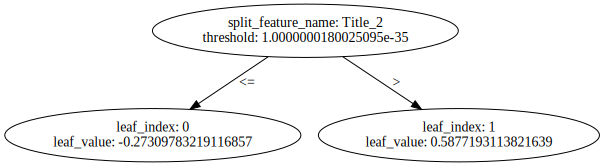

In [93]:
lightgbm.create_tree_digraph(m3, tree_index=0)

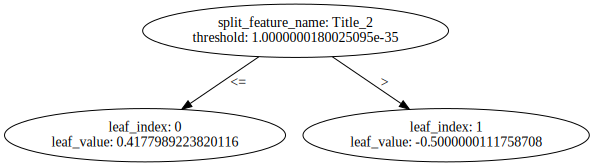

In [96]:
lightgbm.create_tree_digraph(m3, tree_index=1)

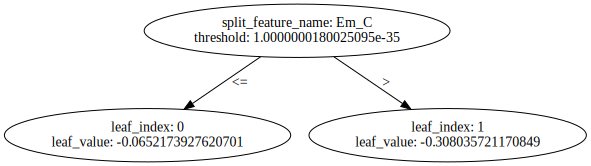

In [95]:
lightgbm.create_tree_digraph(m3, tree_index=2)

In [101]:
first_tree = 0.5877193113821639
second_tree = -0.5000000111758708
third_tree =  -0.0652173927620701

def sigmoid(a):
    return 1/(1+np.exp(-1*a))

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

raw_score = [first_tree, second_tree, third_tree]
print(raw_score)
print(softmax(raw_score))

[0.5877193113821639, -0.5000000111758708, -0.0652173927620701]
[0.53835827 0.18141821 0.28022352]


## Num trees of each round in regress 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.metrics import accuracy_score

import pickle
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')


# read pickle
with open('./X.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('./y.pickle', 'rb') as handle:
    y = pickle.load(handle)

random_index = list(y.sample(250).index)

y_df = pd.DataFrame({'value':y, 'id': list(range(len(y)))})
y_df.value = y_df.apply(lambda x: 2 if x.id in random_index else x.value, 1)
print(Counter(y_df.value))

y = y_df.value

Counter({0: 386, 2: 250, 1: 245})


In [46]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # fix error on MAC_OS when using light gbm, xgboost
from sklearn.metrics import mean_squared_error

import lightgbm
import xgboost
import matplotlib.pyplot as plt

num_trees = 1
max_depth_tree  = 1

m4 = lightgbm.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=1, max_depth=max_depth_tree,
       min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
       n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "rmse" ,objective="rmse",
       random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=2000, subsample_freq=0)
m4.fit(X, y, verbose=1, eval_set=  [(X, y)], eval_names= ['train'], early_stopping_rounds = 2)

res_4 = np.round(m4.predict(X),4)

[1]	train's rmse: 0.650969
Training until validation scores don't improve for 2 rounds.
Did not meet early stopping. Best iteration is:
[1]	train's rmse: 0.650969


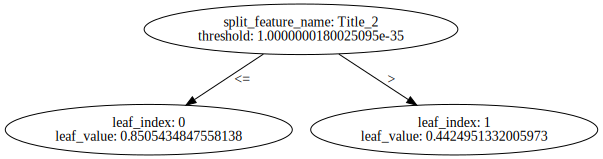

In [47]:
lightgbm.create_tree_digraph(m4, tree_index=0)

In [48]:
res_4 

array([0.4425, 0.8505, 0.8505, 0.8505, 0.4425, 0.4425, 0.4425, 0.8505,
       0.8505, 0.8505, 0.8505, 0.8505, 0.4425, 0.4425, 0.8505, 0.8505,
       0.8505, 0.4425, 0.8505, 0.8505, 0.4425, 0.4425, 0.8505, 0.4425,
       0.8505, 0.8505, 0.4425, 0.8505, 0.4425, 0.8505, 0.8505, 0.8505,
       0.4425, 0.4425, 0.4425, 0.4425, 0.4425, 0.8505, 0.8505, 0.8505,
       0.8505, 0.4425, 0.8505, 0.8505, 0.4425, 0.4425, 0.8505, 0.4425,
       0.8505, 0.8505, 0.4425, 0.8505, 0.8505, 0.4425, 0.4425, 0.8505,
       0.4425, 0.8505, 0.8505, 0.4425, 0.8505, 0.4425, 0.8505, 0.4425,
       0.8505, 0.8505, 0.4425, 0.8505, 0.4425, 0.4425, 0.8505, 0.4425,
       0.4425, 0.4425, 0.4425, 0.4425, 0.4425, 0.8505, 0.8505, 0.4425,
       0.4425, 0.8505, 0.4425, 0.8505, 0.8505, 0.4425, 0.4425, 0.4425,
       0.4425, 0.4425, 0.4425, 0.4425, 0.4425, 0.4425, 0.4425, 0.4425,
       0.8505, 0.4425, 0.8505, 0.4425, 0.4425, 0.4425, 0.4425, 0.4425,
       0.8505, 0.4425, 0.4425, 0.8505, 0.4425, 0.8505, 0.4425, 0.8505,
      

## multi-class: the same tree if keep 1 class and dont care the 2 others?

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.metrics import accuracy_score

import pickle
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')


# read pickle
with open('./X.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('./y.pickle', 'rb') as handle:
    y = pickle.load(handle)

num_2_size = 250
random_index = list(y[y==0].sample(num_2_size, random_state=2019).index)

y_df = pd.DataFrame({'value':y, 'id': list(range(len(y)))})
y_df.value = y_df.apply(lambda x: 2 if x.id in random_index else x.value, 1)

y = y_df.value


import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # fix error on MAC_OS when using light gbm, xgboost
from sklearn.metrics import mean_squared_error

import lightgbm
import xgboost
import matplotlib.pyplot as plt

num_trees = 4
max_depth_tree  = 5
tree_index =10

m5 = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "multi_error" ,objective="multiclassova",num_class =3,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
m5.fit(X, y, verbose=1, eval_set=  [(X, y)], eval_names= ['train'], early_stopping_rounds = 66)

res_5 = np.round(m5.predict_proba(X),1 )
print(Counter(y))

res_5

[1]	train's multi_error: 0.332577
Training until validation scores don't improve for 66 rounds.
[2]	train's multi_error: 0.292849
[3]	train's multi_error: 0.253121
[4]	train's multi_error: 0.240636
Did not meet early stopping. Best iteration is:
[4]	train's multi_error: 0.240636
Counter({1: 340, 0: 291, 2: 250})


array([[0.1, 0. , 0.3],
       [0.1, 1. , 0. ],
       [0.2, 0.2, 0.1],
       ...,
       [0.9, 0.1, 0.1],
       [0.2, 0.9, 0.2],
       [0.5, 0.2, 0.3]])

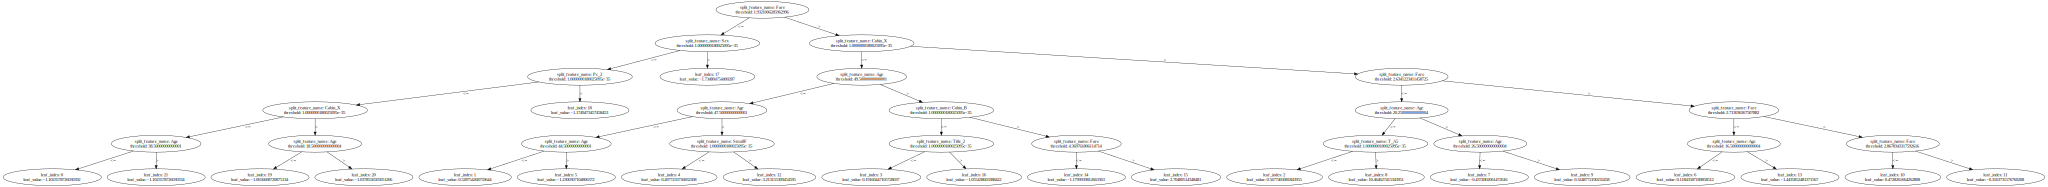

In [310]:
lightgbm.create_tree_digraph(m5, tree_index=tree_index)

In [311]:
# read pickle
with open('./X.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('./y.pickle', 'rb') as handle:
    y = pickle.load(handle)

num_2_size = 100
random_index = list(y[y==0].sample(num_2_size, random_state=2019).index)

y_df = pd.DataFrame({'value':y, 'id': list(range(len(y)))})
y_df.value = y_df.apply(lambda x: 2 if x.id in random_index else x.value, 1)

y = y_df.value

m6 = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "multi_error" ,objective="multiclassova",num_class =3,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
m6.fit(X, y, verbose=1, eval_set=  [(X, y)], eval_names= ['train'], early_stopping_rounds = 66)

res_6 = np.round(m6.predict_proba(X),4)
print(Counter(y))

res_6

[1]	train's multi_error: 0.217934
Training until validation scores don't improve for 66 rounds.
[2]	train's multi_error: 0.182747
[3]	train's multi_error: 0.165721
[4]	train's multi_error: 0.139614
Did not meet early stopping. Best iteration is:
[4]	train's multi_error: 0.139614
Counter({0: 441, 1: 340, 2: 100})


array([[0.8459, 0.0407, 0.0491],
       [0.009 , 0.9918, 0.0059],
       [0.496 , 0.2127, 0.054 ],
       ...,
       [0.9067, 0.0506, 0.0152],
       [0.1665, 0.9431, 0.0348],
       [0.6667, 0.1981, 0.1554]])

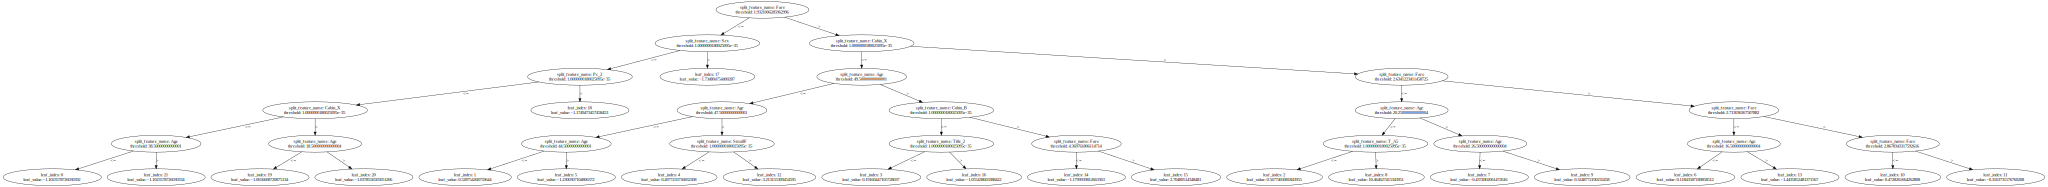

In [312]:
lightgbm.create_tree_digraph(m6, tree_index=tree_index)

Light GBM uses on-vs-the-rest in multi-class. For example, we have 3 classes A, B, C. The algorithm will create 3 trees for each round. The first tree is used to classify class A and NOT A (i.e, B and C), the second tree will try to work on class B and NOT B (A and C). That's why with multi-class problem, we need n_class * num_rounds trees.

At the end, Light GBM uses softmax function to normalize the 3 raw scores to probability, and return that to us.

For Binary problem, 1 tree each round seems enough because it already helps to distinguish 2 classes

How to put it in a practical test? We build two cases: 
case 1 (class 1: x observations, class 0: y, class 2: z), case 2 (class 1: still x obs, class 0: y+t, class 2: z-t)

"multiclass":
    The first trees of class 1 are the same in both cases, while the first trees for class 0 and class 2 are changed as expected. But, note that the second trees of class 1 in the 2 cases are NOT the same any more. I'm supposed that because after the first round, Light gbm calculates the error, and the residual on each case now is different leading to variant from that round.
    
"multiclassova": all the trees of class 1 are the same. !!!

num of trees each round in multi-class: https://github.com/Microsoft/LightGBM/issues/1510

use one vs rest: https://github.com/Microsoft/LightGBM/issues/1667

## Follow-up questions: How to build each tree for each class in multi-class?

? loss func

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.metrics import accuracy_score

import pickle
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')


# read pickle
with open('./X.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('./y.pickle', 'rb') as handle:
    y = pickle.load(handle)

num_2_size = 250
random_index = list(y[y==0].sample(num_2_size, random_state=2019).index)

y_df = pd.DataFrame({'value':y, 'id': list(range(len(y)))})
y_df.value = y_df.apply(lambda x: 2 if x.id in random_index else x.value, 1)

y = y_df.value


import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # fix error on MAC_OS when using light gbm, xgboost
from sklearn.metrics import mean_squared_error

import lightgbm
import xgboost
import matplotlib.pyplot as plt

num_trees = 1
max_depth_tree  = 5

m7 = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "multi_error" ,objective="multiclassova",num_class =3,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
m7.fit(X, y, verbose=1, eval_set=  [(X, y)], eval_names= ['train'])

res_7 = np.round(m7.predict_proba(X),4)
res_7_pred = m7.predict(X)

print(Counter(y))

print(res_7[:2])
print(res_7_pred[:2])

[1]	train's multi_error: 0.332577
Counter({1: 340, 0: 291, 2: 250})
[[0.491  0.161  0.4276]
 [0.1188 0.868  0.0893]]
[0 1]


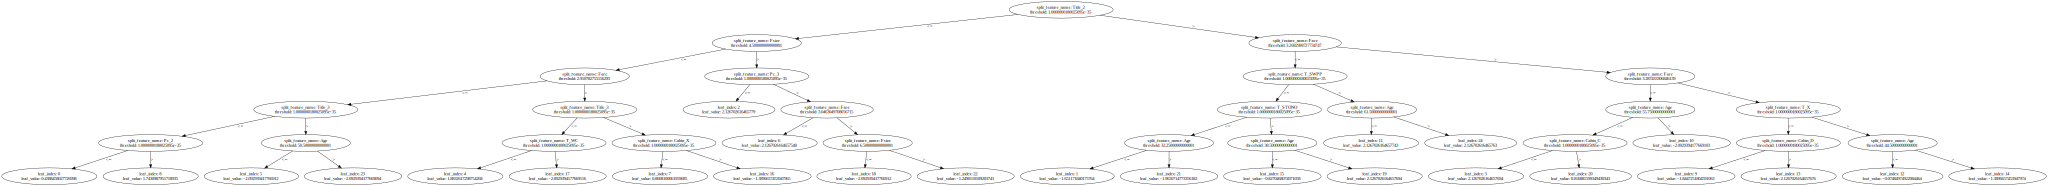

In [160]:
lightgbm.create_tree_digraph(m7, tree_index=1)

In [161]:
# read pickle
with open('./X.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('./y.pickle', 'rb') as handle:
    y = pickle.load(handle)

class_weighted = {0: 1, 1: Counter(y).get(0) / Counter(y).get(1)} 
scale_pos_weight =  Counter(y).get(1) / Counter(y).get(0)
class_weighted_balanced = 'balanced'
m8 = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight = None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "log_loss" ,objective="binary",
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
m8.fit(X, y, verbose=1, eval_set=  [(X, y)], eval_names= ['train'])

res_8 = np.round(m8.predict_proba(X),4)
res_8_pred = m8.predict(X)

print(Counter(y))

print(res_8[:2])
print(res_8_pred[:2])

Counter({0: 541, 1: 340})
[[0.839 0.161]
 [0.132 0.868]]
[0 1]


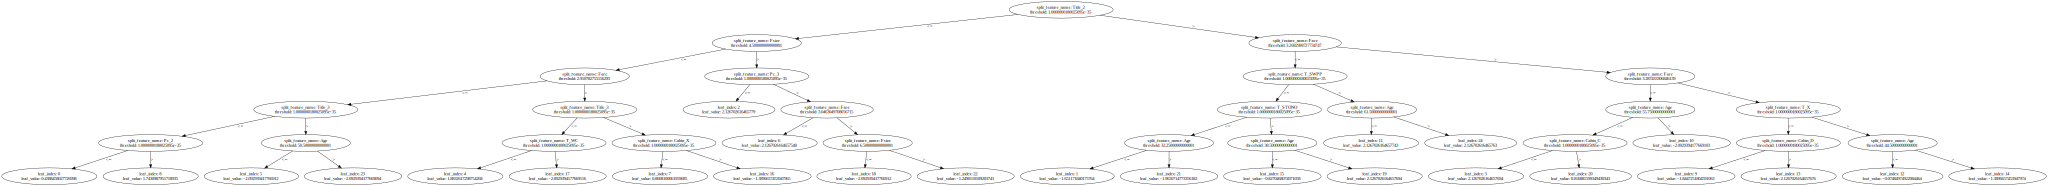

In [162]:
lightgbm.create_tree_digraph(m8, tree_index=0)

In [163]:
# => multiclassova: one vs the rest

## multiclass (softmax) vs multiclassova(one-vs-rest)

In [253]:
# objective="multiclass"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.metrics import accuracy_score

import pickle
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')


# read pickle
with open('./X.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('./y.pickle', 'rb') as handle:
    y = pickle.load(handle)

num_2_size = 250
random_index = list(y[y==0].sample(num_2_size, random_state=2019).index)

y_df = pd.DataFrame({'value':y, 'id': list(range(len(y)))})
y_df.value = y_df.apply(lambda x: 2 if x.id in random_index else x.value, 1)

y = y_df.value


import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # fix error on MAC_OS when using light gbm, xgboost
from sklearn.metrics import mean_squared_error

import lightgbm
import xgboost
import matplotlib.pyplot as plt

num_trees = 1
max_depth_tree  = 4

m7 = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "multi_error" ,objective="multiclass",num_class =3,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
m7.fit(X, y, verbose=1, eval_set=  [(X, y)], eval_names= ['train'])

res_7 = np.round(m7.predict_proba(X),4)
res_7_pred = m7.predict(X)

print(Counter(y))

print(res_7[:10])
print(res_7_pred[:2])

[1]	train's multi_error: 0.358683
Counter({1: 340, 0: 291, 2: 250})
[[0.4306 0.1944 0.375 ]
 [0.1289 0.7816 0.0895]
 [0.2212 0.5833 0.1956]
 [0.1289 0.7816 0.0895]
 [0.4306 0.1944 0.375 ]
 [0.4306 0.1944 0.375 ]
 [0.5641 0.2051 0.2308]
 [0.4565 0.209  0.3345]
 [0.2212 0.5833 0.1956]
 [0.1051 0.8029 0.092 ]]
[0 1]


In [254]:
X[:1][["Title_2"]]

,Title_2
0,1


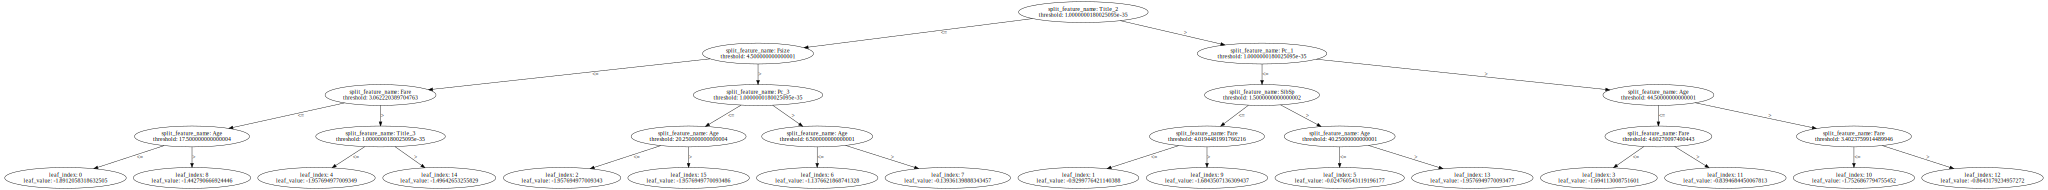

In [255]:
lightgbm.create_tree_digraph(m7, tree_index=2 )

In [257]:
# objective="multiclassova"
m7 = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "multi_error" ,objective="multiclassova",num_class =3,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
m7.fit(X, y, verbose=1, eval_set=  [(X, y)], eval_names= ['train'])

res_7 = np.round(m7.predict_proba(X),4)
res_7_pred = m7.predict(X)

print(Counter(y))

print(res_7[:10])
print(res_7_pred[:10])

[1]	train's multi_error: 0.358683
Counter({1: 340, 0: 291, 2: 250})
[[0.4814 0.1501 0.4337]
 [0.1573 0.8651 0.0893]
 [0.244  0.677  0.2155]
 [0.1573 0.8651 0.0893]
 [0.4814 0.1501 0.4337]
 [0.4814 0.1501 0.4337]
 [0.8274 0.3715 0.4662]
 [0.4638 0.1447 0.3358]
 [0.244  0.677  0.2155]
 [0.1053 0.8651 0.0893]]
[0 1 1 1 0 0 0 0 1 1]


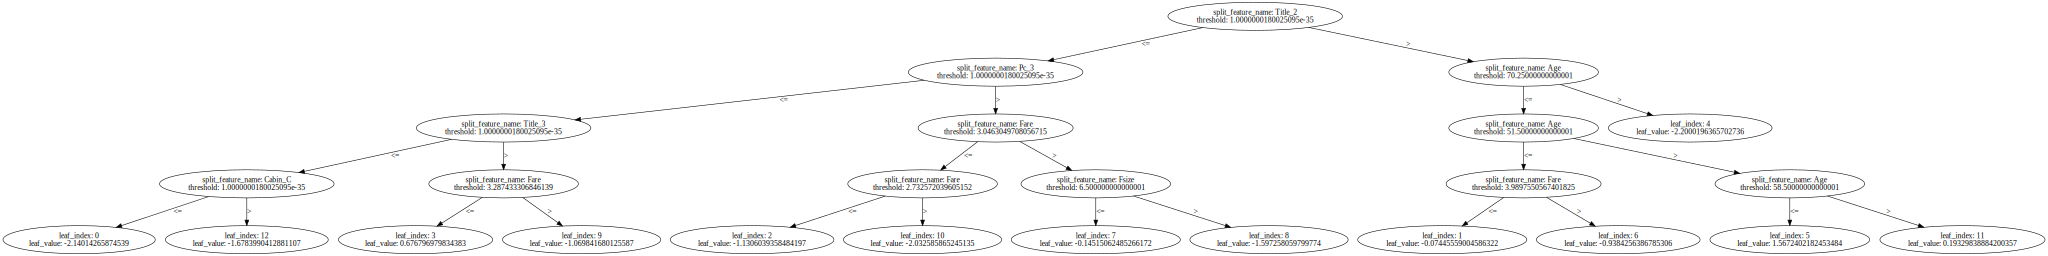

In [258]:
lightgbm.create_tree_digraph(m7, tree_index=0)

In [217]:
#multiclass
first_tree = -0.8144926992190362
second_tree = -1.4332152523097632
third_tree =  -1.0177743520590425

def sigmoid(a):
    return 1/(1+np.exp(-1*a))

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

raw_score = [first_tree, second_tree, third_tree]
print(raw_score)
print(softmax(raw_score)) #[0.42468608 0.22874954 0.34656438] sum=1

[-0.8144926992190362, -1.4332152523097632, -1.0177743520590425]
[0.42468608 0.22874954 0.34656438]


* How to build the tree to get raw score: 

 "multiclass": 
 
 "multiclassova": for each round, build n_class tree with one-vs-rest strategy, use objective = log_loss (checked!)



* How to understand the results from the trees:

 "multiclass": we get n_class raw scores, then we apply a softmax function to get the result
these results can be interpreted as the probabilities (sum up to 1)

 "multiclassova": Use sigmoid for every single raw score, so the sum is not equal 1.


In [252]:
#multiclassova
first_tree = -0.12031595063697131

second_tree = -1.426680149203856
third_tree =  -0.44220023264918557

def sigmoid(a):
    return np.exp(a)/(1+np.exp(a))

raw_score = [first_tree, second_tree, third_tree]
print(raw_score)
print(sigmoid(raw_score)) #[0.46995724 0.19361648 0.39121682], sum is not equal 1

[-0.12031595063697131, -1.426680149203856, -0.44220023264918557]
[0.46995724 0.19361648 0.39121682]


In [246]:
res_7[0, :].sum()

1.0548

In [250]:
res_7[19, :].sum()

1.053

In [251]:
res_7[20, :].sum()

1.0548

## how to understand "multiclass" - how to build tree

In [442]:
# objective="multiclass"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.metrics import accuracy_score

import pickle
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')


# read pickle
with open('./X.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('./y.pickle', 'rb') as handle:
    y = pickle.load(handle)

num_2_size = 100 
random_index = list(y[y==0].sample(num_2_size, random_state=2019).index)

y_df = pd.DataFrame({'value':y, 'id': list(range(len(y)))})
y_df.value = y_df.apply(lambda x: 2 if x.id in random_index else x.value, 1)

y = y_df.value


import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # fix error on MAC_OS when using light gbm, xgboost
from sklearn.metrics import mean_squared_error

import lightgbm
import xgboost
import matplotlib.pyplot as plt

num_trees = 1
max_depth_tree  = 1

m7 = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "multi_error" ,objective="multiclass",num_class =3,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
m7.fit(X, y, verbose=1, eval_set=  [(X, y)], eval_names= ['train'])

res_7 = np.round(m7.predict_proba(X),4)
res_7_pred = m7.predict(X)

print(Counter(y))

print(res_7[:10])
print(res_7_pred[:2])

[1]	train's multi_error: 0.298524
Counter({0: 441, 1: 340, 2: 100})
[[0.6829 0.2185 0.0986]
 [0.2498 0.6565 0.0937]
 [0.2498 0.6565 0.0937]
 [0.2498 0.6565 0.0937]
 [0.6829 0.2185 0.0986]
 [0.6829 0.2185 0.0986]
 [0.6829 0.2185 0.0986]
 [0.2008 0.5276 0.2716]
 [0.2498 0.6565 0.0937]
 [0.2498 0.6565 0.0937]]
[0 1]


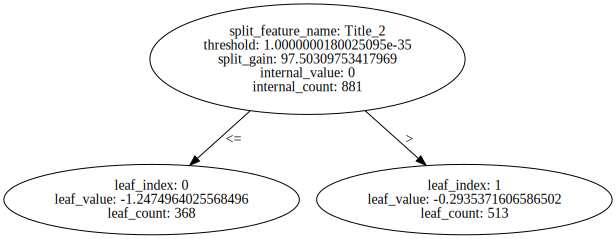

In [443]:
lightgbm.create_tree_digraph(m7, tree_index=0,  show_info=["split_gain",
                                                  "internal_value", "internal_count", "leaf_count"])

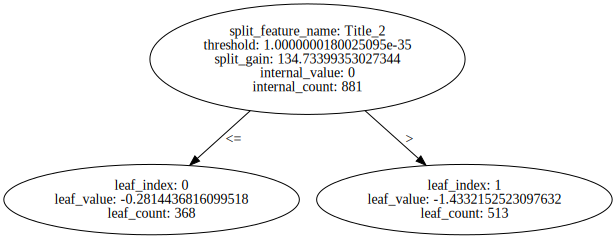

In [444]:
lightgbm.create_tree_digraph(m7, tree_index=1,  show_info=["split_gain",
                                                  "internal_value", "internal_count", "leaf_count"])

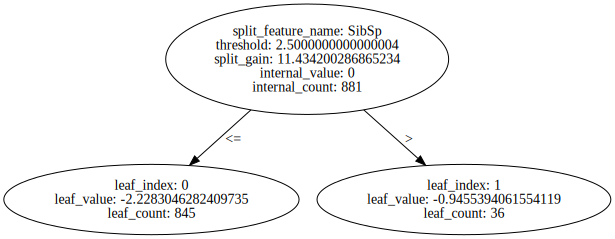

In [445]:
lightgbm.create_tree_digraph(m7, tree_index=2,  show_info=["split_gain",
                                                  "internal_value", "internal_count", "leaf_count"])

In [446]:
# objective="binary"

# read pickle
with open('./X.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('./y.pickle', 'rb') as handle:
    y = pickle.load(handle)

class_weighted = {0: 1, 1: Counter(y).get(0) / Counter(y).get(1)} #0.8152
scale_pos_weight =  Counter(y).get(0) / Counter(y).get(1) #0.8248
class_weighted_balanced = 'balanced' #0.8152
class_wei = None #0.8499

m8 = lightgbm.LGBMClassifier(boosting_type='gbdt',class_weight = None ,  colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31 ,objective="binary",
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
m8.fit(X, y, verbose=1, eval_set=  [(X, y)], eval_names= ['train'])

res_8 = np.round(m8.predict_proba(X, predict_contrib=True),4)
res_8_pred = m8.predict(X, predict_contrib=True)

print(Counter(y))

print(res_8[:10])
print(res_8_pred[:2])

[1]	train's binary_logloss: 0.510285
Counter({0: 541, 1: 340})
[[0.8064 0.1936]
 [0.2938 0.7062]
 [0.2938 0.7062]
 [0.2938 0.7062]
 [0.8064 0.1936]
 [0.8064 0.1936]
 [0.8064 0.1936]
 [0.2938 0.7062]
 [0.2938 0.7062]
 [0.2938 0.7062]]
[0 1]


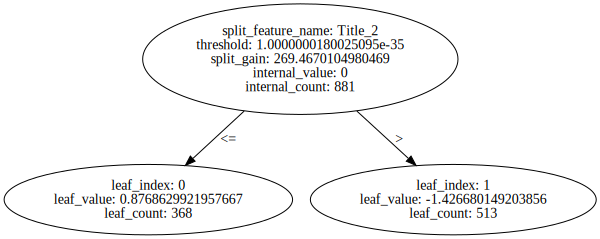

In [447]:
lightgbm.create_tree_digraph(m8, tree_index=0,  show_info=["split_gain",
                                                  "internal_value", "internal_count", "leaf_count"])